In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [177]:
dong_list = ['낙성대동',
    '난곡동', '난향동', '남현동', '대학동',
    '미성동', '보라매동', '삼성동', '서림동',
    '서원동', '성현동', '신림동', '신사동',
    '신원동', '은천동', '인헌동', '조원동',
    '중앙동', '청룡동', '청림동', '행운동']

index = dong_list.index('낙성대동')

one_hot =[[ 0 if i != index else 1 for i in range(len(dong_list))]]
one_hot=pd.DataFrame(one_hot)

pd.concat([one_hot,one_hot,one_hot,one_hot],axis=1)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
data = pd.read_csv('./Data2/data+detail_0220.csv')
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,...,프랜차이즈_점포_수^21,점포수2,개업_점포_수2,프랜차이즈_점포_수2,점포수^22,점포수 개업_점포_수2,점포수 프랜차이즈_점포_수2,개업_점포_수^22,개업_점포_수 프랜차이즈_점포_수2,프랜차이즈_점포_수^22
0,2014,1,A,골목상권,11620,관악구,11620525,보라매동,1000804,당곡길,...,3.258097,8.426150,2.0,2.236068,71.0,16.8523,18.841444,4.0,4.472136,5.0
1,2014,1,A,골목상권,11620,관악구,11620525,보라매동,1000811,봉천로13길,...,1.609438,1.000000,0.0,1.414214,1.0,0.0000,1.414214,0.0,0.000000,2.0
2,2014,1,A,골목상권,11620,관악구,11620545,청림동,1000783,관악로30길,...,4.174387,6.000000,1.0,2.828427,36.0,6.0000,16.970563,1.0,2.828427,8.0
3,2014,1,A,골목상권,11620,관악구,11620545,청림동,1000835,청림3길,...,1.609438,4.472136,0.0,1.414214,20.0,0.0000,6.324555,0.0,0.000000,2.0
4,2014,1,A,골목상권,11620,관악구,11620565,성현동,1000786,구암길,...,2.302585,3.872983,0.0,1.732051,15.0,0.0000,6.708204,0.0,0.000000,3.0


In [179]:
# 지워야 될 컬럼 지우고 다시 저장
data.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '행정동_코드_명', '상권_코드', '상권_코드_명', '점포수', '총매출액', '점포매출액',
       '개업_점포_수', '프랜차이즈_점포_수', '점포수1', '개업_점포_수1', '프랜차이즈_점포_수1', '점포수^21',
       '점포수 개업_점포_수1', '점포수 프랜차이즈_점포_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1',
       '프랜차이즈_점포_수^21', '점포수2', '개업_점포_수2', '프랜차이즈_점포_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '프랜차이즈_점포_수^22'],
      dtype='object')

### 직장인구 데이터 붙이기

In [180]:
pop=pd.read_csv('./Raw/서울시_우리마을가게_상권분석서비스(구_상권_직장인구).csv',encoding='euc-kr')

In [181]:
pop.isnull().sum()

기준_년월_코드               0
기준_분기_코드               0
상권_구분_코드               0
상권_구분_코드_명             0
상권_코드                  0
상권_코드_명                0
총_직장_인구_수              0
남성_직장_인구_수             0
여성_직장_인구_수             0
연령대_10_직장_인구_수         0
연령대_20_직장_인구_수         0
연령대_30_직장_인구_수         0
연령대_40_직장_인구_수         0
연령대_50_직장_인구_수         0
연령대_60_이상_직장_인구_수      0
남성연령대_10_직장_인구_수       0
남성연령대_20_직장_인구_수       0
남성연령대_30_직장_인구_수       0
남성연령대_40_직장_인구_수       0
남성연령대_50_직장_인구_수       0
남성연령대_60_이상_직장_인구_수    0
여성연령대_10_직장_인구_수       0
여성연령대_20_직장_인구_수       0
여성연령대_30_직장_인구_수       0
여성연령대_40_직장_인구_수       0
여성연령대_50_직장_인구_수       0
여성연령대_60_이상_직장_인구_수    0
dtype: int64

In [182]:
pop.columns

Index(['기준_년월_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수', '연령대_10_직장_인구_수',
       '연령대_20_직장_인구_수', '연령대_30_직장_인구_수', '연령대_40_직장_인구_수', '연령대_50_직장_인구_수',
       '연령대_60_이상_직장_인구_수', '남성연령대_10_직장_인구_수', '남성연령대_20_직장_인구_수',
       '남성연령대_30_직장_인구_수', '남성연령대_40_직장_인구_수', '남성연령대_50_직장_인구_수',
       '남성연령대_60_이상_직장_인구_수', '여성연령대_10_직장_인구_수', '여성연령대_20_직장_인구_수',
       '여성연령대_30_직장_인구_수', '여성연령대_40_직장_인구_수', '여성연령대_50_직장_인구_수',
       '여성연령대_60_이상_직장_인구_수'],
      dtype='object')

In [183]:
pop.rename(
    columns={
        '기준_년월_코드':'기준_년_코드'
    },
    inplace=True
)

In [184]:
pop.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,2021,1,A,골목상권,1000007,북촌로5길,503,419,84,0,...,150,133,88,29,0,12,27,23,14,8
1,2021,1,A,골목상권,1000756,사당로8길,131,70,61,0,...,9,24,22,13,0,14,10,17,15,5
2,2021,1,R,전통시장,1001278,남평화시장,5,3,2,0,...,2,0,0,1,0,0,2,0,0,0
3,2021,1,A,골목상권,1000058,백범로90길,535,288,247,0,...,71,89,57,43,0,34,62,72,55,24
4,2021,1,A,골목상권,1000059,서빙고로71길,432,265,167,1,...,49,58,64,80,1,26,55,59,17,9


In [185]:
pop.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수', '연령대_10_직장_인구_수',
       '연령대_20_직장_인구_수', '연령대_30_직장_인구_수', '연령대_40_직장_인구_수', '연령대_50_직장_인구_수',
       '연령대_60_이상_직장_인구_수', '남성연령대_10_직장_인구_수', '남성연령대_20_직장_인구_수',
       '남성연령대_30_직장_인구_수', '남성연령대_40_직장_인구_수', '남성연령대_50_직장_인구_수',
       '남성연령대_60_이상_직장_인구_수', '여성연령대_10_직장_인구_수', '여성연령대_20_직장_인구_수',
       '여성연령대_30_직장_인구_수', '여성연령대_40_직장_인구_수', '여성연령대_50_직장_인구_수',
       '여성연령대_60_이상_직장_인구_수'],
      dtype='object')

In [186]:
data_temp=pd.merge(data,pop,on=['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'])

In [187]:
data.shape

(1984, 33)

In [188]:
1984 - 1852

132

In [189]:
len(data['상권_코드_명'].unique())

62

In [190]:
data_temp.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '행정동_코드_명', '상권_코드', '상권_코드_명', '점포수', '총매출액', '점포매출액',
       '개업_점포_수', '프랜차이즈_점포_수', '점포수1', '개업_점포_수1', '프랜차이즈_점포_수1', '점포수^21',
       '점포수 개업_점포_수1', '점포수 프랜차이즈_점포_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1',
       '프랜차이즈_점포_수^21', '점포수2', '개업_점포_수2', '프랜차이즈_점포_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '프랜차이즈_점포_수^22', '총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수',
       '연령대_10_직장_인구_수', '연령대_20_직장_인구_수', '연령대_30_직장_인구_수', '연령대_40_직장_인구_수',
       '연령대_50_직장_인구_수', '연령대_60_이상_직장_인구_수', '남성연령대_10_직장_인구_수',
       '남성연령대_20_직장_인구_수', '남성연령대_30_직장_인구_수', '남성연령대_40_직장_인구_수',
       '남성연령대_50_직장_인구_수', '남성연령대_60_이상_직장_인구_수', '여성연령대_10_직장_인구_수',
       '여성연령대_20_직장_인구_수', '여성연령대_30_직장_인구_수', '여성연령대_40_직장_인구_수',
       '여성연령대_50_직장_인구_수', '여성연령대_60_이상_직장_인구_수'],
      dtype='object')

In [191]:
data_temp2=pd.merge(data,pop,on=['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'],
                    how='left'
                    )

In [192]:
data_temp2.isnull().sum()

기준_년_코드                  0
기준_분기_코드                 0
상권_구분_코드                 0
상권_구분_코드_명               0
시군구코드                    0
시군구명                     0
행정동_코드                   0
행정동_코드_명                 0
상권_코드                    0
상권_코드_명                  0
점포수                      0
총매출액                     0
점포매출액                    0
개업_점포_수                  0
프랜차이즈_점포_수               0
점포수1                     0
개업_점포_수1                 0
프랜차이즈_점포_수1              0
점포수^21                   0
점포수 개업_점포_수1             0
점포수 프랜차이즈_점포_수1          0
개업_점포_수^21               0
개업_점포_수 프랜차이즈_점포_수1      0
프랜차이즈_점포_수^21            0
점포수2                     0
개업_점포_수2                 0
프랜차이즈_점포_수2              0
점포수^22                   0
점포수 개업_점포_수2             0
점포수 프랜차이즈_점포_수2          0
개업_점포_수^22               0
개업_점포_수 프랜차이즈_점포_수2      0
프랜차이즈_점포_수^22            0
총_직장_인구_수              132
남성_직장_인구_수             132
여성_직장_인구_수             132
연령대_10_직장_인구_수         132
연

In [193]:
null_data=data_temp2[data_temp2['총_직장_인구_수'].isnull()]

In [194]:
null_data.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '행정동_코드_명', '상권_코드', '상권_코드_명', '점포수', '총매출액', '점포매출액',
       '개업_점포_수', '프랜차이즈_점포_수', '점포수1', '개업_점포_수1', '프랜차이즈_점포_수1', '점포수^21',
       '점포수 개업_점포_수1', '점포수 프랜차이즈_점포_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1',
       '프랜차이즈_점포_수^21', '점포수2', '개업_점포_수2', '프랜차이즈_점포_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '프랜차이즈_점포_수^22', '총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수',
       '연령대_10_직장_인구_수', '연령대_20_직장_인구_수', '연령대_30_직장_인구_수', '연령대_40_직장_인구_수',
       '연령대_50_직장_인구_수', '연령대_60_이상_직장_인구_수', '남성연령대_10_직장_인구_수',
       '남성연령대_20_직장_인구_수', '남성연령대_30_직장_인구_수', '남성연령대_40_직장_인구_수',
       '남성연령대_50_직장_인구_수', '남성연령대_60_이상_직장_인구_수', '여성연령대_10_직장_인구_수',
       '여성연령대_20_직장_인구_수', '여성연령대_30_직장_인구_수', '여성연령대_40_직장_인구_수',
       '여성연령대_50_직장_인구_수', '여성연령대_60_이상_직장_인구_수'],
      dtype='object')

In [195]:
for i in null_data.columns[:10]:
    print(null_data[i].unique())
    print(len(null_data[i].unique()))
    
    print(data[i].unique())
    print(len(data[i].unique()))

[2014 2015 2016 2017 2018 2019 2020 2021]
8
[2014 2015 2016 2017 2018 2019 2020 2021]
8
[1 2 3 4]
4
[1 2 3 4]
4
['A']
1
['A']
1
['골목상권']
1
['골목상권']
1
[11620]
1
[11620]
1
['관악구']
1
['관악구']
1
[11620525 11620545 11620565 11620575 11620585 11620595 11620605 11620615
 11620625 11620630 11620645 11620655 11620665 11620685 11620695 11620715
 11620725 11620735 11620745 11620765 11620775]
21
[11620525 11620545 11620565 11620575 11620585 11620595 11620605 11620615
 11620625 11620630 11620645 11620655 11620665 11620685 11620695 11620715
 11620725 11620735 11620745 11620765 11620775]
21
['보라매동' '청림동' '성현동' '행운동' '낙성대동' '청룡동' '은천동' '중앙동' '인헌동' '남현동' '서원동' '신원동'
 '서림동' '신사동' '신림동' '난향동' '조원동' '대학동' '삼성동' '미성동' '난곡동']
21
['보라매동' '청림동' '성현동' '행운동' '낙성대동' '청룡동' '은천동' '중앙동' '인헌동' '남현동' '서원동' '신원동'
 '서림동' '신사동' '신림동' '난향동' '조원동' '대학동' '삼성동' '미성동' '난곡동']
21
[1000804 1000811 1000783 1000835 1000786 1000825 1000782 1000836 1000837
 1000780 1000781 1000799 1000827 1000828 1000833 1000834 1000843 1000812
 100

### null 값인 것이 군데 군데 빈다는 말인데 그냥 해도 될까?? 일단 진행하자. 빼고 진행

In [196]:
data = data_temp

### 산점도 찍기

In [197]:
data.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '행정동_코드_명', '상권_코드', '상권_코드_명', '점포수', '총매출액', '점포매출액',
       '개업_점포_수', '프랜차이즈_점포_수', '점포수1', '개업_점포_수1', '프랜차이즈_점포_수1', '점포수^21',
       '점포수 개업_점포_수1', '점포수 프랜차이즈_점포_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1',
       '프랜차이즈_점포_수^21', '점포수2', '개업_점포_수2', '프랜차이즈_점포_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '프랜차이즈_점포_수^22', '총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수',
       '연령대_10_직장_인구_수', '연령대_20_직장_인구_수', '연령대_30_직장_인구_수', '연령대_40_직장_인구_수',
       '연령대_50_직장_인구_수', '연령대_60_이상_직장_인구_수', '남성연령대_10_직장_인구_수',
       '남성연령대_20_직장_인구_수', '남성연령대_30_직장_인구_수', '남성연령대_40_직장_인구_수',
       '남성연령대_50_직장_인구_수', '남성연령대_60_이상_직장_인구_수', '여성연령대_10_직장_인구_수',
       '여성연령대_20_직장_인구_수', '여성연령대_30_직장_인구_수', '여성연령대_40_직장_인구_수',
       '여성연령대_50_직장_인구_수', '여성연령대_60_이상_직장_인구_수'],
      dtype='object')

In [198]:
# 매출액
target_name=data.columns[12]

In [199]:
# 찍을 컬럼이름
features=data.columns[33:]

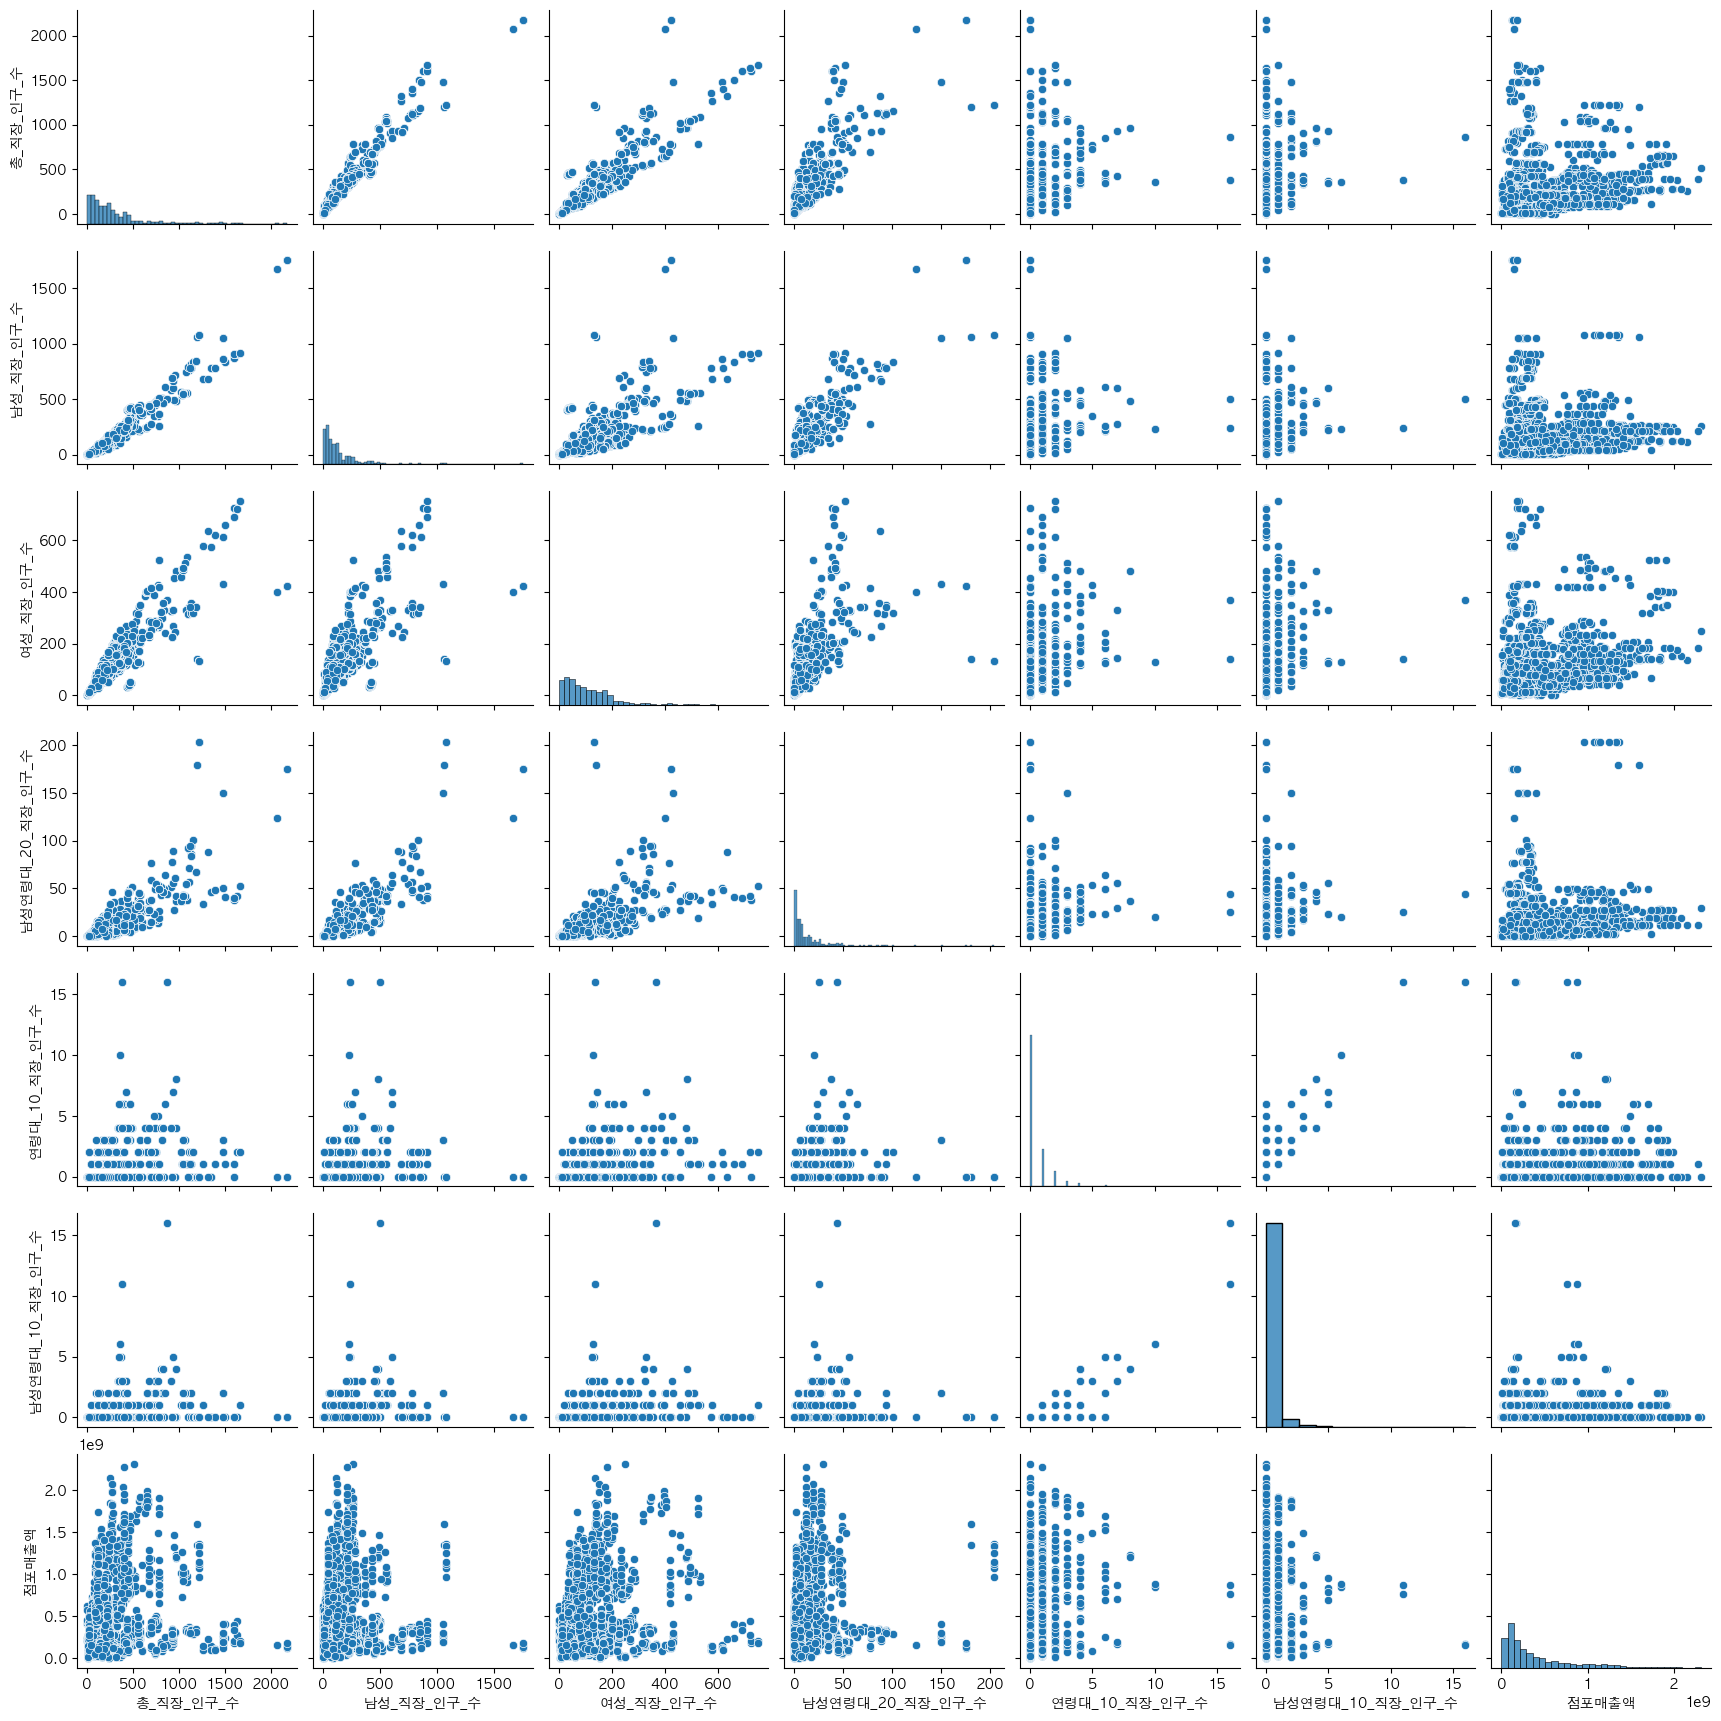

In [200]:
sns.pairplot(
    data,
    vars=['총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수','남성연령대_20_직장_인구_수',
       '연령대_10_직장_인구_수', '남성연령대_10_직장_인구_수','점포매출액']
)

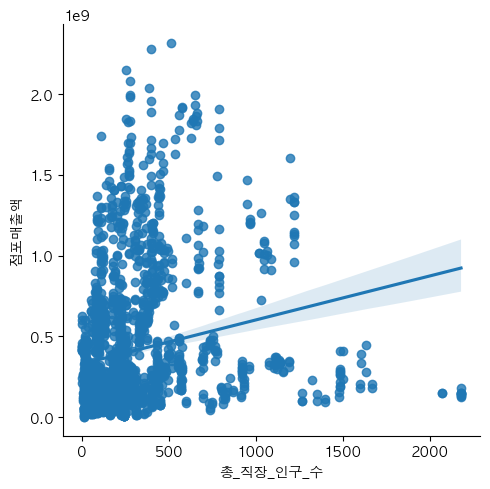

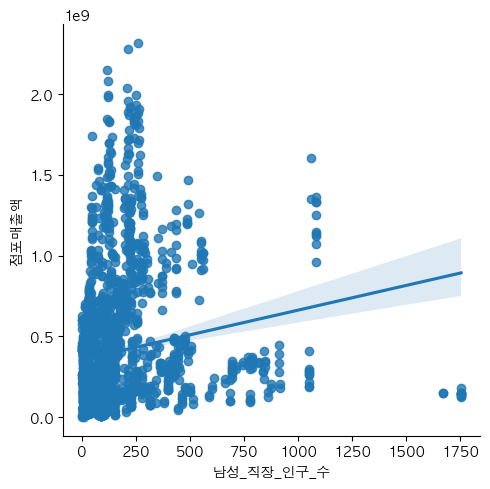

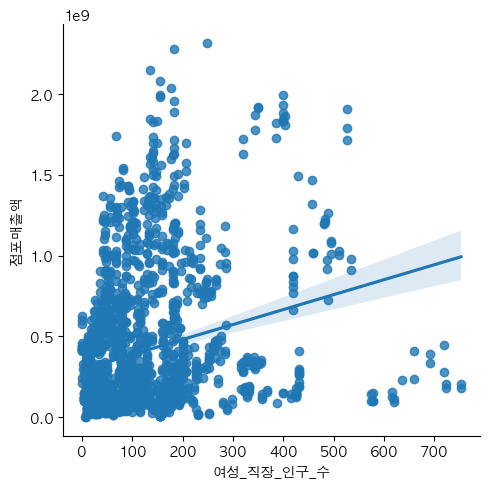

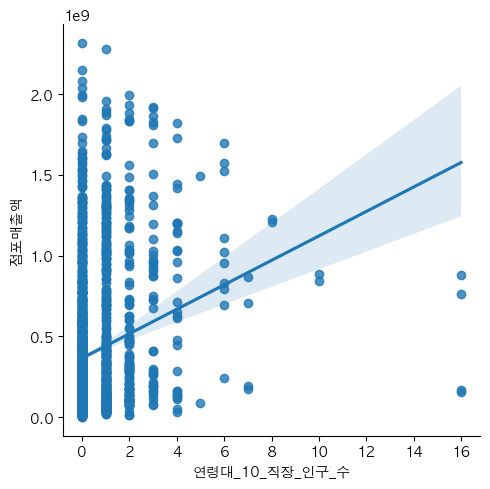

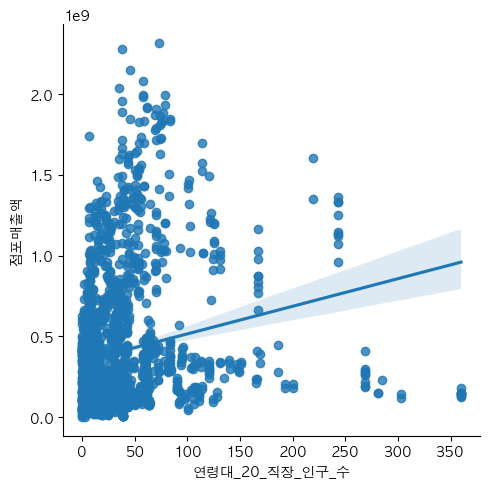

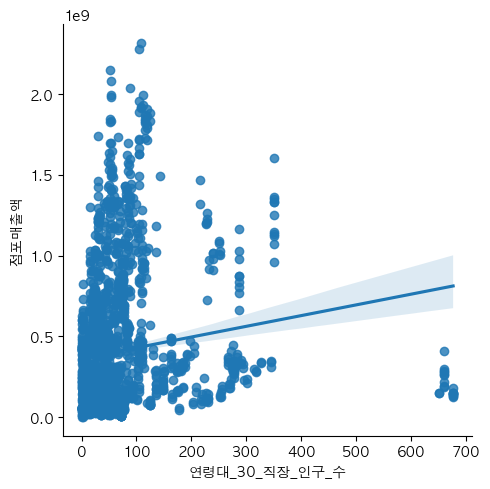

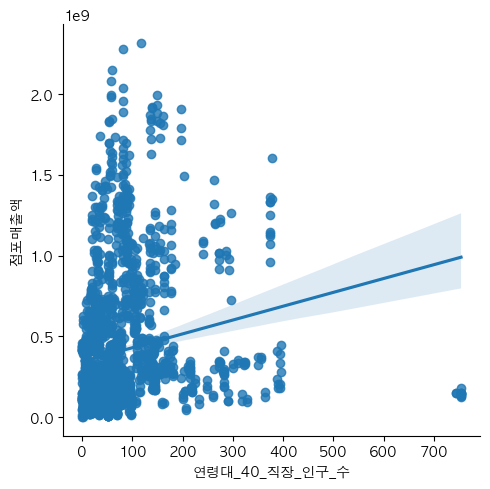

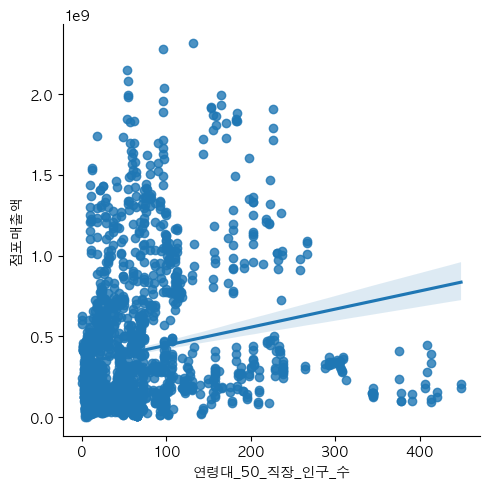

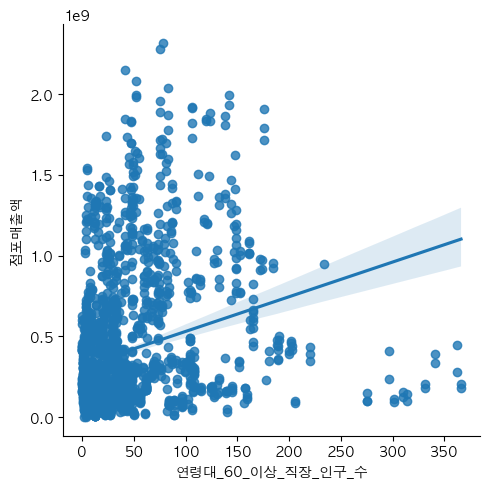

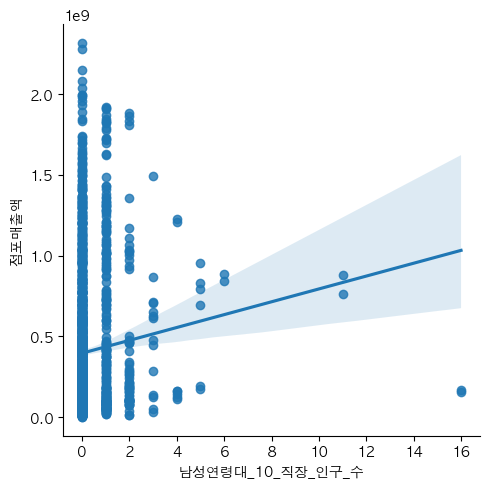

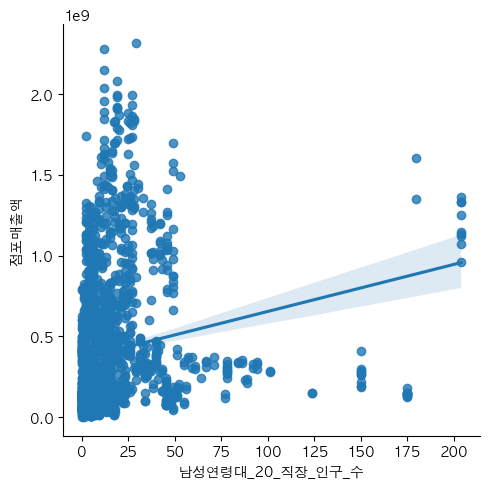

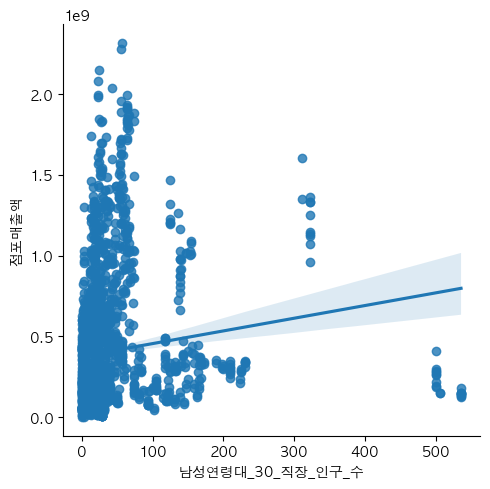

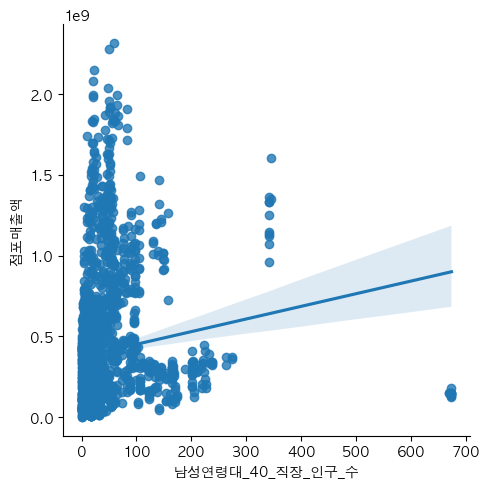

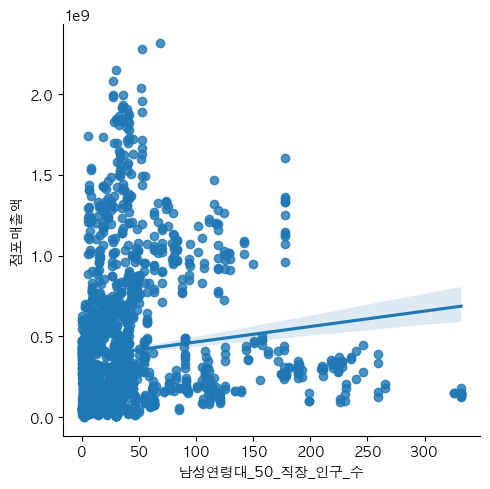

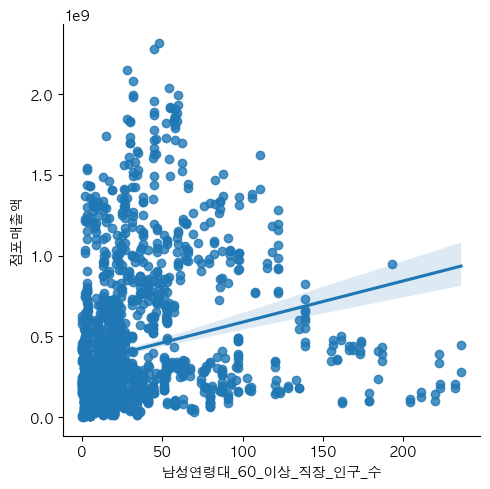

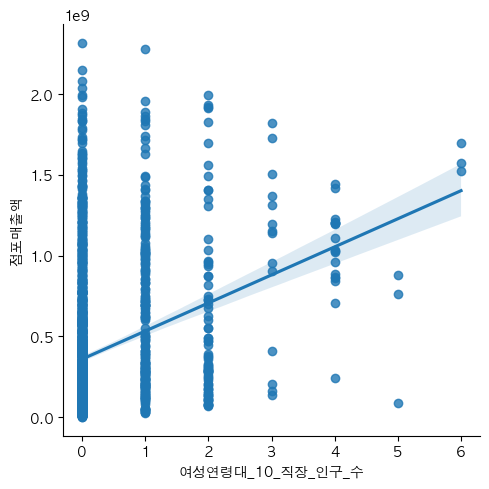

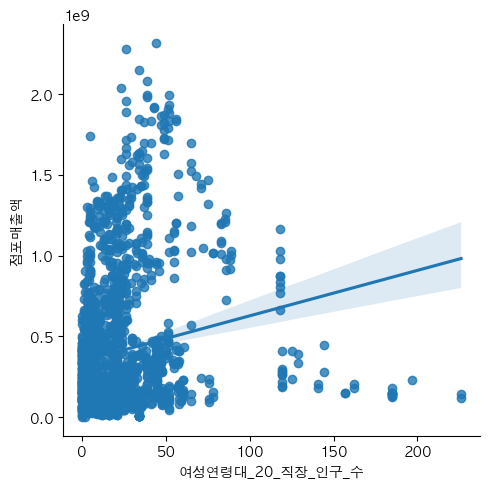

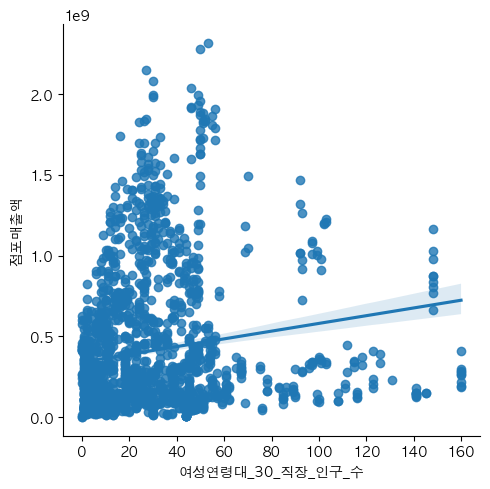

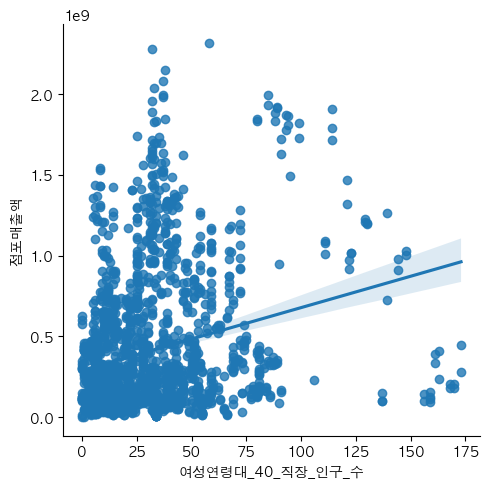

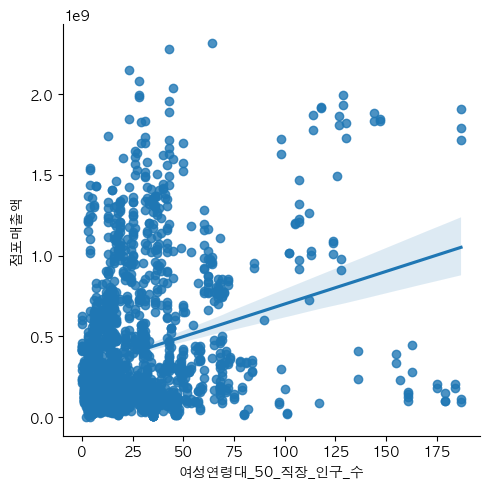

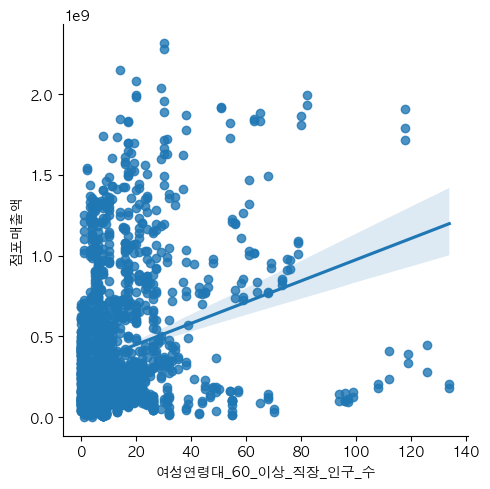

In [201]:
for feature in features:
    sns.lmplot(
        data=data,
        x= feature,
        y=target_name
    )

#### 다른 분포를 가진다고 할 만하게 없다. 
### 상관관계 찍어보자

<Axes: >

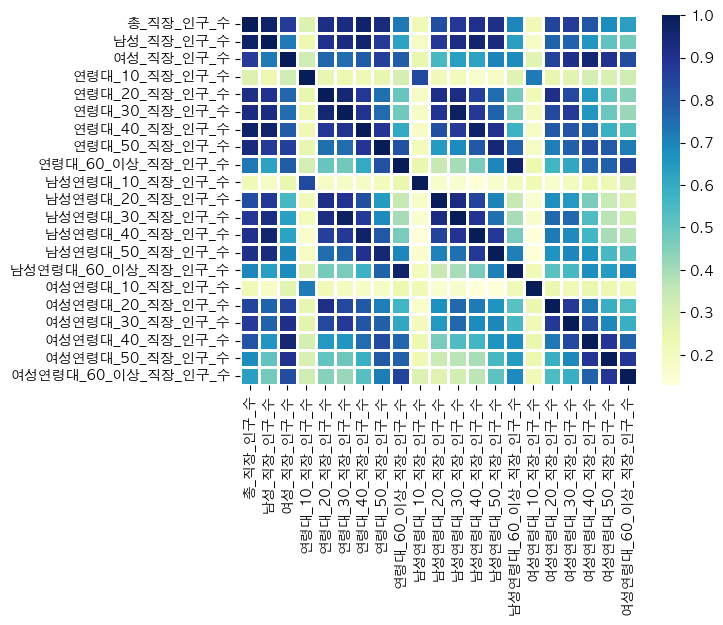

In [202]:
table=data[features].corr()
sns.heatmap(
	table,
	annot=False,
	fmt='f',
	cmap='YlGnBu',
	linewidth=2,
	cbar=True
)

### 10대 직장 인구수 빼고는 높은 상관관계를 가지기 때문에
### 이는 제외하고
### 총 직장 인구 수 연령대 10 직장 인구 수만 남기고 해보도록 하겠다잇

In [203]:
desc=data.iloc[:,:10]
target=data.iloc[:,12:13]
feature1=data.iloc[:,10:11]
feature2=data.iloc[:,13:15]
feature3=data[['총_직장_인구_수','연령대_10_직장_인구_수']]

In [204]:
data = pd.concat([desc,target,feature1,feature2,feature3],axis=1)

<Axes: >

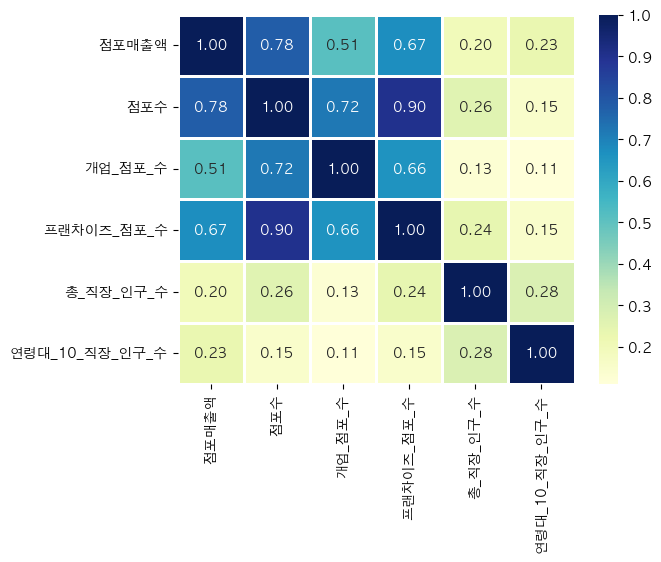

In [205]:
table=data.iloc[:,10:].corr()
sns.heatmap(
	np.round(table,2),
	annot=True,
	fmt='.2f',
	cmap='YlGnBu',
	linewidth=2,
	cbar=True
)

### 특성공학 조지기

In [206]:
from sklearn.preprocessing import PolynomialFeatures
train_input = data[['점포수','개업_점포_수','프랜차이즈_점포_수','총_직장_인구_수','연령대_10_직장_인구_수']]
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)

train_poly=poly.transform(train_input)


columns=poly.get_feature_names_out() + '1'

train_poly =np.log1p(train_poly) 

train_poly = pd.DataFrame(train_poly,columns=columns)

columns

array(['점포수1', '개업_점포_수1', '프랜차이즈_점포_수1', '총_직장_인구_수1', '연령대_10_직장_인구_수1',
       '점포수^21', '점포수 개업_점포_수1', '점포수 프랜차이즈_점포_수1', '점포수 총_직장_인구_수1',
       '점포수 연령대_10_직장_인구_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1',
       '개업_점포_수 총_직장_인구_수1', '개업_점포_수 연령대_10_직장_인구_수1', '프랜차이즈_점포_수^21',
       '프랜차이즈_점포_수 총_직장_인구_수1', '프랜차이즈_점포_수 연령대_10_직장_인구_수1',
       '총_직장_인구_수^21', '총_직장_인구_수 연령대_10_직장_인구_수1', '연령대_10_직장_인구_수^21'],
      dtype=object)

In [207]:
data=pd.concat([data,train_poly],axis=1)

In [208]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)

train_poly=poly.transform(train_input)


columns=poly.get_feature_names_out() + '2'


train_poly =np.sqrt(train_poly) 

train_poly = pd.DataFrame(train_poly,columns=columns)

In [209]:
data=pd.concat([data,train_poly],axis=1)

In [210]:
data=pd.get_dummies(data,columns=['행정동_코드_명'])

In [211]:
data.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '상권_코드', '상권_코드_명', '점포매출액', '점포수', '개업_점포_수', '프랜차이즈_점포_수',
       '총_직장_인구_수', '연령대_10_직장_인구_수', '점포수1', '개업_점포_수1', '프랜차이즈_점포_수1',
       '총_직장_인구_수1', '연령대_10_직장_인구_수1', '점포수^21', '점포수 개업_점포_수1',
       '점포수 프랜차이즈_점포_수1', '점포수 총_직장_인구_수1', '점포수 연령대_10_직장_인구_수1',
       '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1', '개업_점포_수 총_직장_인구_수1',
       '개업_점포_수 연령대_10_직장_인구_수1', '프랜차이즈_점포_수^21', '프랜차이즈_점포_수 총_직장_인구_수1',
       '프랜차이즈_점포_수 연령대_10_직장_인구_수1', '총_직장_인구_수^21',
       '총_직장_인구_수 연령대_10_직장_인구_수1', '연령대_10_직장_인구_수^21', '점포수2', '개업_점포_수2',
       '프랜차이즈_점포_수2', '총_직장_인구_수2', '연령대_10_직장_인구_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '점포수 총_직장_인구_수2',
       '점포수 연령대_10_직장_인구_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '개업_점포_수 총_직장_인구_수2', '개업_점포_수 연령대_10_직장_인구_수2', '프랜차이즈_점포_수^22',
       '프랜차이즈_점포_수 총_직장_인구_수2', '프랜차이즈_점포_수 연령대_10_직장_인구_수2', '총_직장_인구_수^22',
       '총_직장_인구_수 연령대_10_직장_

In [212]:
feature = data[['점포수', '개업_점포_수', '프랜차이즈_점포_수',
       '총_직장_인구_수', '연령대_10_직장_인구_수', '점포수1', '개업_점포_수1', '프랜차이즈_점포_수1',
       '총_직장_인구_수1', '연령대_10_직장_인구_수1', '점포수^21', '점포수 개업_점포_수1',
       '점포수 프랜차이즈_점포_수1', '점포수 총_직장_인구_수1', '점포수 연령대_10_직장_인구_수1',
       '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1', '개업_점포_수 총_직장_인구_수1',
       '개업_점포_수 연령대_10_직장_인구_수1', '프랜차이즈_점포_수^21', '프랜차이즈_점포_수 총_직장_인구_수1',
       '프랜차이즈_점포_수 연령대_10_직장_인구_수1', '총_직장_인구_수^21',
       '총_직장_인구_수 연령대_10_직장_인구_수1', '연령대_10_직장_인구_수^21', '점포수2', '개업_점포_수2',
       '프랜차이즈_점포_수2', '총_직장_인구_수2', '연령대_10_직장_인구_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '점포수 총_직장_인구_수2',
       '점포수 연령대_10_직장_인구_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '개업_점포_수 총_직장_인구_수2', '개업_점포_수 연령대_10_직장_인구_수2', '프랜차이즈_점포_수^22',
       '프랜차이즈_점포_수 총_직장_인구_수2', '프랜차이즈_점포_수 연령대_10_직장_인구_수2', '총_직장_인구_수^22',
       '총_직장_인구_수 연령대_10_직장_인구_수2', '연령대_10_직장_인구_수^22', '행정동_코드_명_낙성대동',
       '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동', '행정동_코드_명_대학동',
       '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동', '행정동_코드_명_서림동',
       '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동', '행정동_코드_명_신사동',
       '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동', '행정동_코드_명_조원동',
       '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동', '행정동_코드_명_행운동']]
target = data['점포매출액']

In [213]:
from module.default import basic
from module.error import model_err_measure
basic(feature,target)
model_err_measure(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.8893858820860846
test :  0.8143433842958249
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.8144968025084947
test :  0.7730649380003193
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.808730900194426
test :  0.7722082614571586
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.8083336380863422
test :  0.7728451607088276
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.9895347515453334
test :  0.9302707128404668
--------------------------------------------------


,model_name,MSE,MAE,RMSE,R2Score
0,lr,3.276818e+16,1.313377e+08,1.810198e+08,0.785897
0,rd,3.367846e+16,1.332222e+08,1.835169e+08,0.774618
0,ls,3.401159e+16,1.339477e+08,1.844223e+08,0.774367


In [214]:
feature = data[['점포수', '개업_점포_수', '프랜차이즈_점포_수',
       '총_직장_인구_수', '연령대_10_직장_인구_수', '점포수1', '개업_점포_수1', '프랜차이즈_점포_수1',
       '총_직장_인구_수1', '연령대_10_직장_인구_수1', '점포수^21', '점포수 개업_점포_수1',
       '점포수 프랜차이즈_점포_수1', '점포수 총_직장_인구_수1', '점포수 연령대_10_직장_인구_수1',
       '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1', '개업_점포_수 총_직장_인구_수1',
       '개업_점포_수 연령대_10_직장_인구_수1', '프랜차이즈_점포_수^21', '프랜차이즈_점포_수 총_직장_인구_수1',
       '프랜차이즈_점포_수 연령대_10_직장_인구_수1', '총_직장_인구_수^21',
       '총_직장_인구_수 연령대_10_직장_인구_수1', '연령대_10_직장_인구_수^21', '행정동_코드_명_낙성대동',
       '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동', '행정동_코드_명_대학동',
       '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동', '행정동_코드_명_서림동',
       '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동', '행정동_코드_명_신사동',
       '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동', '행정동_코드_명_조원동',
       '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동', '행정동_코드_명_행운동']]
target = data['점포매출액']

In [215]:
basic(feature,target)
model_err_measure(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.8946345883567526
test :  0.82167470214728
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.8047853925675131
test :  0.7853440693127873
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.7999272373843447
test :  0.7825292096686776
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.8001798680661523
test :  0.7817896945456516
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.9904763578557659
test :  0.9272619729491567
--------------------------------------------------


,model_name,MSE,MAE,RMSE,R2Score
0,lr,3.196585e+16,1.236668e+08,1.787900e+08,0.773007
0,rd,3.300087e+16,1.265191e+08,1.816614e+08,0.762228
0,ls,3.296588e+16,1.262217e+08,1.815651e+08,0.763650


In [216]:
feature = data[['점포수', '개업_점포_수', '프랜차이즈_점포_수',
       '총_직장_인구_수', '연령대_10_직장_인구_수', '점포수2', '개업_점포_수2',
       '프랜차이즈_점포_수2', '총_직장_인구_수2', '연령대_10_직장_인구_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '점포수 총_직장_인구_수2',
       '점포수 연령대_10_직장_인구_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '개업_점포_수 총_직장_인구_수2', '개업_점포_수 연령대_10_직장_인구_수2', '프랜차이즈_점포_수^22',
       '프랜차이즈_점포_수 총_직장_인구_수2', '프랜차이즈_점포_수 연령대_10_직장_인구_수2', '총_직장_인구_수^22',
       '총_직장_인구_수 연령대_10_직장_인구_수2', '연령대_10_직장_인구_수^22', '행정동_코드_명_낙성대동',
       '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동', '행정동_코드_명_대학동',
       '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동', '행정동_코드_명_서림동',
       '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동', '행정동_코드_명_신사동',
       '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동', '행정동_코드_명_조원동',
       '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동', '행정동_코드_명_행운동']]
target = data['점포매출액']

In [217]:
basic(feature,target)
model_err_measure(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.8881193736979884
test :  0.8100961952537062
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.801167363407562
test :  0.785932571912034
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.8010638421430395
test :  0.785827060926711
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.8011686513586025
test :  0.7858946330640374
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.9901512722377301
test :  0.9371015241534962
--------------------------------------------------


,model_name,MSE,MAE,RMSE,R2Score
0,lr,3.897913e+16,1.439044e+08,1.974313e+08,0.729157
0,rd,3.914663e+16,1.438596e+08,1.978551e+08,0.725533
0,ls,3.900860e+16,1.438735e+08,1.975060e+08,0.728637


In [218]:
feature = data[['점포수', '개업_점포_수', '프랜차이즈_점포_수',
       '총_직장_인구_수', '연령대_10_직장_인구_수', '행정동_코드_명_낙성대동',
       '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동', '행정동_코드_명_대학동',
       '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동', '행정동_코드_명_서림동',
       '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동', '행정동_코드_명_신사동',
       '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동', '행정동_코드_명_조원동',
       '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동', '행정동_코드_명_행운동']]
target = data['점포매출액']

In [219]:
basic(feature,target)
model_err_measure(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.8846552972076058
test :  0.8172303088412587
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.7778593522731606
test :  0.7682124830174285
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.7777897486814772
test :  0.7682951998152991
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.7778593522731564
test :  0.7682124829502399
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.9909976492705989
test :  0.9438878111882293
--------------------------------------------------


,model_name,MSE,MAE,RMSE,R2Score
0,lr,3.879676e+16,1.418193e+08,1.969689e+08,0.732267
0,rd,3.893012e+16,1.418827e+08,1.973072e+08,0.729861
0,ls,3.879676e+16,1.418193e+08,1.969689e+08,0.732267


In [220]:
data=pd.concat([data,desc['행정동_코드_명']],axis=1)

In [221]:
# 이거 다 넣을 때가 최고 인듯
data.to_csv('./Data2/final.csv',index=False)

In [222]:
data=pd.concat([desc,target,feature1,feature2],axis=1)

### 점포수 가지고만 특성공학 조지기

In [223]:
from sklearn.preprocessing import PolynomialFeatures
train_input = data[['점포수','개업_점포_수','프랜차이즈_점포_수']]
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)

train_poly=poly.transform(train_input)


columns=poly.get_feature_names_out() + '1'

train_poly =np.log1p(train_poly) 

train_poly = pd.DataFrame(train_poly,columns=columns)

columns

array(['점포수1', '개업_점포_수1', '프랜차이즈_점포_수1', '점포수^21', '점포수 개업_점포_수1',
       '점포수 프랜차이즈_점포_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1',
       '프랜차이즈_점포_수^21'], dtype=object)

In [224]:
data=pd.concat([data,train_poly],axis=1)

In [225]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)

train_poly=poly.transform(train_input)


columns=poly.get_feature_names_out() + '2'


train_poly =np.sqrt(train_poly) 

train_poly = pd.DataFrame(train_poly,columns=columns)

In [226]:
data=pd.concat([data,train_poly],axis=1)

In [227]:
data=pd.get_dummies(data,columns=['행정동_코드_명'])

In [228]:
data.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '상권_코드', '상권_코드_명', '점포매출액', '점포수', '개업_점포_수', '프랜차이즈_점포_수',
       '점포수1', '개업_점포_수1', '프랜차이즈_점포_수1', '점포수^21', '점포수 개업_점포_수1',
       '점포수 프랜차이즈_점포_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1', '프랜차이즈_점포_수^21',
       '점포수2', '개업_점포_수2', '프랜차이즈_점포_수2', '점포수^22', '점포수 개업_점포_수2',
       '점포수 프랜차이즈_점포_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2', '프랜차이즈_점포_수^22',
       '행정동_코드_명_낙성대동', '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동',
       '행정동_코드_명_대학동', '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동',
       '행정동_코드_명_서림동', '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동',
       '행정동_코드_명_신사동', '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동',
       '행정동_코드_명_조원동', '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동',
       '행정동_코드_명_행운동'],
      dtype='object')

In [229]:
feature=data[['점포수', '개업_점포_수', '프랜차이즈_점포_수',
       '점포수1', '개업_점포_수1', '프랜차이즈_점포_수1', '점포수^21', '점포수 개업_점포_수1',
       '점포수 프랜차이즈_점포_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1', '프랜차이즈_점포_수^21',
       '점포수2', '개업_점포_수2', '프랜차이즈_점포_수2', '점포수^22', '점포수 개업_점포_수2',
       '점포수 프랜차이즈_점포_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2', '프랜차이즈_점포_수^22',
       '행정동_코드_명_낙성대동', '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동',
       '행정동_코드_명_대학동', '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동',
       '행정동_코드_명_서림동', '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동',
       '행정동_코드_명_신사동', '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동',
       '행정동_코드_명_조원동', '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동',
       '행정동_코드_명_행운동']]
target = data['점포매출액']

In [230]:
basic(feature,target)
model_err_measure(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.8182775244215448
test :  0.7078913907817757
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.795675853814387
test :  0.76577454048976
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.7930633180058219
test :  0.7725144635145063
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.7928543802004421
test :  0.7730420618071393
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.9867293342090265
test :  0.9273763064381452
--------------------------------------------------


,model_name,MSE,MAE,RMSE,R2Score
0,lr,4.766861e+16,1.450063e+08,2.183314e+08,0.694477
0,rd,4.470487e+16,1.438363e+08,2.114353e+08,0.701679
0,ls,4.464619e+16,1.442832e+08,2.112964e+08,0.703422


In [231]:
feature=data[['점포수', '개업_점포_수', '프랜차이즈_점포_수',
       '점포수1', '개업_점포_수1', '프랜차이즈_점포_수1', '점포수^21', '점포수 개업_점포_수1',
       '점포수 프랜차이즈_점포_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1', 
       '행정동_코드_명_낙성대동', '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동',
       '행정동_코드_명_대학동', '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동',
       '행정동_코드_명_서림동', '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동',
       '행정동_코드_명_신사동', '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동',
       '행정동_코드_명_조원동', '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동',
       '행정동_코드_명_행운동']]
target = data['점포매출액']

In [232]:
basic(feature,target)
model_err_measure(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.8402249627571097
test :  0.756937161699014
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.7855309617262255
test :  0.7735422196110939
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.7842582164749476
test :  0.7729402399365526
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.784835025965753
test :  0.7733360435854977
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.9861993830071304
test :  0.9206877644721067
--------------------------------------------------


,model_name,MSE,MAE,RMSE,R2Score
0,lr,5.069305e+16,1.558776e+08,2.251512e+08,0.684640
0,rd,5.086784e+16,1.545210e+08,2.255390e+08,0.682302
0,ls,5.092493e+16,1.556086e+08,2.256655e+08,0.684168


In [233]:
feature=data[['점포수', '개업_점포_수', '프랜차이즈_점포_수',
       '점포수2', '개업_점포_수2', '프랜차이즈_점포_수2', '점포수^22', '점포수 개업_점포_수2',
       '점포수 프랜차이즈_점포_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2', '프랜차이즈_점포_수^22',
       '행정동_코드_명_낙성대동', '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동',
       '행정동_코드_명_대학동', '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동',
       '행정동_코드_명_서림동', '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동',
       '행정동_코드_명_신사동', '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동',
       '행정동_코드_명_조원동', '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동',
       '행정동_코드_명_행운동']]
target = data['점포매출액']

In [234]:
basic(feature,target)
model_err_measure(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.8197365644276757
test :  0.7173789336180247
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.7835627498689983
test :  0.7703409105350143
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.7836285863439498
test :  0.7707571302051537
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.7837147522261863
test :  0.7709352859930526
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.9871015650441338
test :  0.9261749213668203
--------------------------------------------------


,model_name,MSE,MAE,RMSE,R2Score
0,lr,4.781015e+16,1.478276e+08,2.186553e+08,0.638410
0,rd,4.787938e+16,1.478013e+08,2.188136e+08,0.640370
0,ls,4.758625e+16,1.476624e+08,2.181427e+08,0.645347


In [235]:
feature=data[['점포수', '개업_점포_수', '프랜차이즈_점포_수',
       '행정동_코드_명_낙성대동', '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동',
       '행정동_코드_명_대학동', '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동',
       '행정동_코드_명_서림동', '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동',
       '행정동_코드_명_신사동', '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동',
       '행정동_코드_명_조원동', '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동',
       '행정동_코드_명_행운동']]
target = data['점포매출액']

In [236]:
basic(feature,target)
model_err_measure(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.8549441007416538
test :  0.7657459976203537
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.7640774395980573
test :  0.7474241183247871
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.7640141829198657
test :  0.7477504362643465
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.7640774395980537
test :  0.7474241195339018
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.987699439176675
test :  0.9263336161269853
--------------------------------------------------


,model_name,MSE,MAE,RMSE,R2Score
0,lr,4.531229e+16,1.456008e+08,2.128668e+08,0.688064
0,rd,4.533499e+16,1.453354e+08,2.129201e+08,0.685426
0,ls,4.531229e+16,1.456008e+08,2.128668e+08,0.688064
